In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('data2.csv')


In [60]:
df.head()

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan
0,1,25,1,49.0,91107,4.0,1.6,Undergrad,0,1,0,NO,NO
1,2,45,19,34.0,90089,3.0,1.5,Undergrad,0,1,0,NO,NO
2,3,39,15,11.0,94720,1.0,1.0,Undergrad,0,0,0,NO,NO
3,4,35,9,NaN,94112,1.0,2.7,Graduate,0,0,0,NO,NO
4,5,35,8,45.0,91330,4.0,1.0,Graduate,0,0,0,NO,NO


In [61]:
nan_cols = df.columns[df.isna().any()].tolist()
nan_cols

['Income', 'Family Size']

In [62]:

from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
df[nan_cols] = imputer.fit_transform(df[nan_cols])


In [63]:
nan_cols = df.columns[df.isna().any()].tolist()
nan_cols

[]

In [64]:

# Define features and target variable
X = df.drop(['Personal Loan','Postal Code','ID'], axis=1)
y = df['Personal Loan']






In [65]:
X.head()
# y.head()

,Age,Experience,Income,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking
0,25,1,49.000000,4.0,1.6,Undergrad,0,1,0,NO
1,45,19,34.000000,3.0,1.5,Undergrad,0,1,0,NO
2,39,15,11.000000,1.0,1.0,Undergrad,0,0,0,NO
3,35,9,73.840361,1.0,2.7,Graduate,0,0,0,NO
4,35,8,45.000000,4.0,1.0,Graduate,0,0,0,NO


In [66]:
# require one hot encoding
categorical_features =['InternetBanking']  

# Dont appear to be significant features 
not_using=['Postal Code','ID']

# require label encoding
output_feature='Personal Loan'

ordinal_feature=['Education']

# no encoding required
numerical_features = ['Age','Experience','Income','CCAvgSpending','Family Size','Mortgage','Investment Account','Deposit Account']

In [67]:
# df[['Personal Loan']]

In [68]:

# # Define categorical and numeric features
# categorical_features = ['education']
# numerical_features = ['age', 'income']



In [69]:


# Define one-hot encoding and standard scaling transformers
onehot = OneHotEncoder(drop='first',sparse=False)
scaler = StandardScaler()


In [70]:

# Apply one-hot encoding and standard scaling to categorical and numeric features, respectively
X_cat = onehot.fit_transform(X[categorical_features])

X_cat

c:\Users\mayan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [71]:
type(X_cat)

numpy.ndarray

In [72]:

X_num = scaler.fit_transform(X[numerical_features])
X_num

array([[-1.77441684, -1.66607847, -0.54021418, ..., -0.55552393,
         2.92891517, -0.25354028],
       [-0.02952359, -0.09633022, -0.86642572, ..., -0.55552393,
         2.92891517, -0.25354028],
       [-0.55299157, -0.44516316, -1.36661675, ..., -0.55552393,
        -0.34142334, -0.25354028],
       ...,
       [ 1.54088033,  1.64783451, -1.08390008, ..., -0.55552393,
        -0.34142334, -0.25354028],
       [ 1.71536965,  1.73504275, -0.54021418, ..., -0.55552393,
        -0.34142334, -0.25354028],
       [-1.51268285, -1.40445376,  0.19919866, ..., -0.55552393,
        -0.34142334, -0.25354028]])

In [73]:
df[['Education']]

,Education
0,Undergrad
1,Undergrad
2,Undergrad
3,Graduate
4,Graduate
...,...
4995,Advanced Degree
4996,Undergrad
4997,Advanced Degree
4998,Graduate


In [74]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_categories = ['Undergrad', 'Graduate', 'Advanced Degree']

oe = OrdinalEncoder(categories=[ordinal_categories])
X_ordinal= oe.fit_transform(df[['Education']])
# df['Education'] = oe.fit_transform(df[['Education']])
X_ordinal

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [1.],
       [0.]])

In [75]:

# Concatenate preprocessed categorical and numeric features
# X_preprocessed = pd.concat([pd.DataFrame(X_cat.toarray()), pd.DataFrame(X_num, columns=numerical_features)], axis=1)
X_preprocessed = pd.concat([pd.DataFrame(X_cat, columns=categorical_features), pd.DataFrame(X_num, columns=numerical_features),pd.DataFrame(X_ordinal,columns=ordinal_feature)] ,axis=1)

X_preprocessed

,InternetBanking,Age,Experience,Income,CCAvgSpending,Family Size,Mortgage,Investment Account,Deposit Account,Education
0,0.0,-1.774417,-1.666078,-0.540214,-0.193385,1.397759,-0.555524,2.928915,-0.25354,0.0
1,0.0,-0.029524,-0.096330,-0.866426,-0.250611,0.525950,-0.555524,2.928915,-0.25354,0.0
2,0.0,-0.552992,-0.445163,-1.366617,-0.536736,-1.217668,-0.555524,-0.341423,-0.25354,0.0
3,0.0,-0.901970,-0.968413,0.000000,0.436091,-1.217668,-0.555524,-0.341423,-0.25354,1.0
4,0.0,-0.901970,-1.055621,-0.627204,-0.536736,1.397759,-0.555524,-0.341423,-0.25354,1.0
...,...,...,...,...,...,...,...,...,...,...
4995,1.0,-1.425438,-1.491662,-0.735941,-0.021710,-1.217668,-0.555524,-0.341423,-0.25354,2.0
4996,1.0,-1.338194,-1.404454,-1.279627,-0.880087,1.397759,0.280238,-0.341423,-0.25354,0.0
4997,0.0,1.540880,1.647835,-1.083900,-0.937312,-0.345859,-0.555524,-0.341423,-0.25354,2.0
4998,1.0,1.715370,1.735043,-0.540214,-0.822862,0.525950,-0.555524,-0.341423,-0.25354,1.0


In [76]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define machine learning models
logreg = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()


In [77]:

# Train and evaluate machine learning models
for model in [logreg, svm, rf]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {type(model).__name__}, Accuracy: {accuracy:.2f}")


Model: LogisticRegression, Accuracy: 0.96
Model: SVC, Accuracy: 0.98
Model: RandomForestClassifier, Accuracy: 0.99


In [ ]:
from sklearn.pipeline import Pipeline

# HYPERPARAMTER TUNING

In [78]:
from sklearn.model_selection import GridSearchCV


models = [
    {
        'name': 'RandomForestClassifier',
        'model': RandomForestClassifier(),
        'hyperparameters': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10]
        }
    },
    {
        'name': 'SVC',
        'model': SVC(),
        'hyperparameters': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'sigmoid']
        }
    },
    {
        'name': 'LogisticRegression',
        'model': LogisticRegression(),
        'hyperparameters': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    }
]

# Perform grid search for each model
for model in models:
    print(f"Grid search for {model['name']}")
    grid_search = GridSearchCV(model['model'], model['hyperparameters'], cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training accuracy: {grid_search.best_score_:.2f}")
    print(f"Test accuracy: {grid_search.score(X_test, y_test):.2f}")
    print('\n')

Grid search for RandomForestClassifier
Best parameters: {'max_depth': None, 'n_estimators': 100}
Training accuracy: 0.99
Test accuracy: 0.99


Grid search for SVC
Best parameters: {'C': 10, 'kernel': 'rbf'}
Training accuracy: 0.98
Test accuracy: 0.98


Grid search for LogisticRegression
Best parameters: {'C': 1, 'penalty': 'l2'}
Training accuracy: 0.95
Test accuracy: 0.96




c:\Users\mayan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mayan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mayan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\mayan\AppData\Local\Programs\Python\

In [ ]:
# DATA VISUALIZATION 



Grid search for RandomForestClassifier
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Training accuracy: 0.99
Test accuracy: 0.99


Grid search for SVC
Best parameters: {'C': 10, 'kernel': 'rbf'}
Training accuracy: 0.98
Test accuracy: 0.98


Grid search for LogisticRegression


c:\Users\mayan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mayan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mayan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\mayan\AppData\Local\Programs\Python\

Best parameters: {'C': 1, 'penalty': 'l2'}
Training accuracy: 0.95
Test accuracy: 0.96




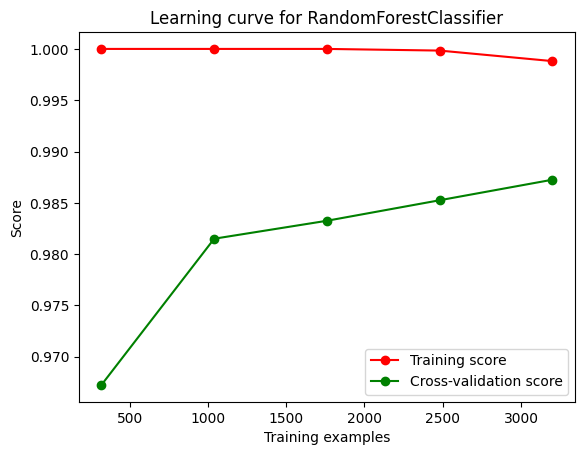

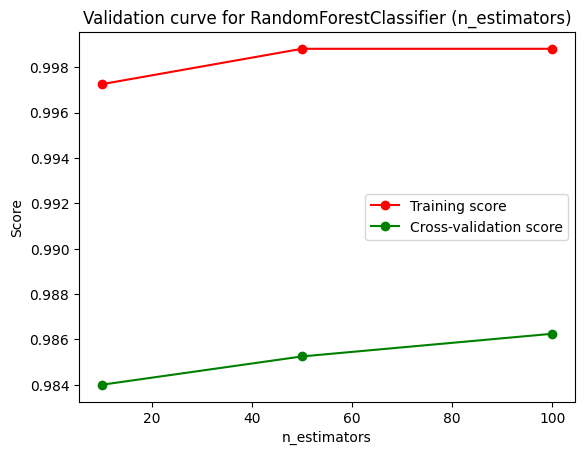

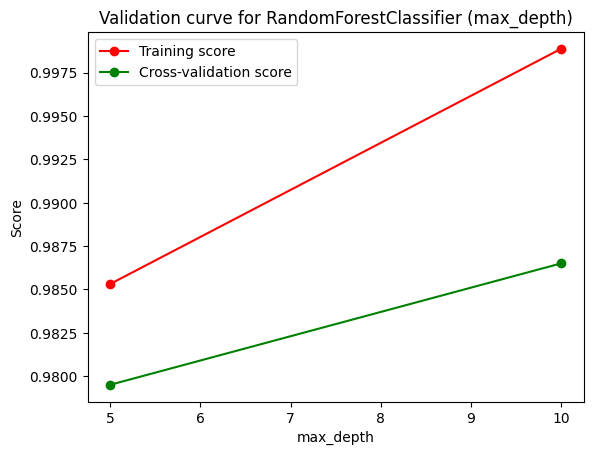

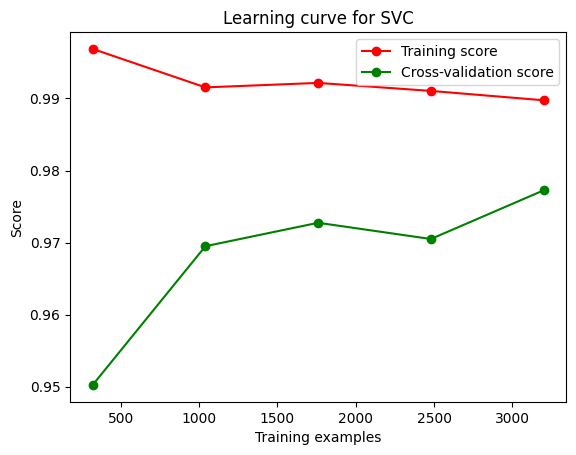

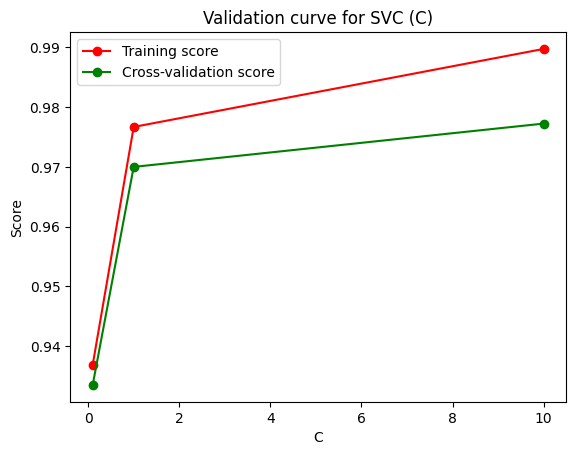

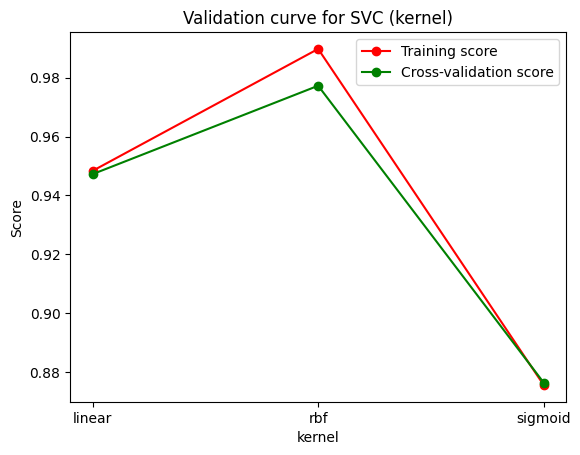

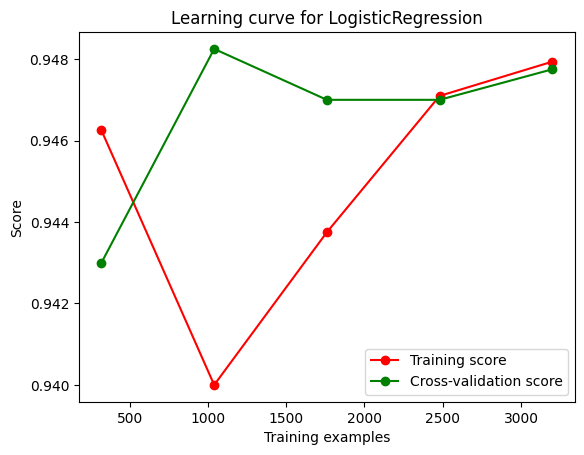

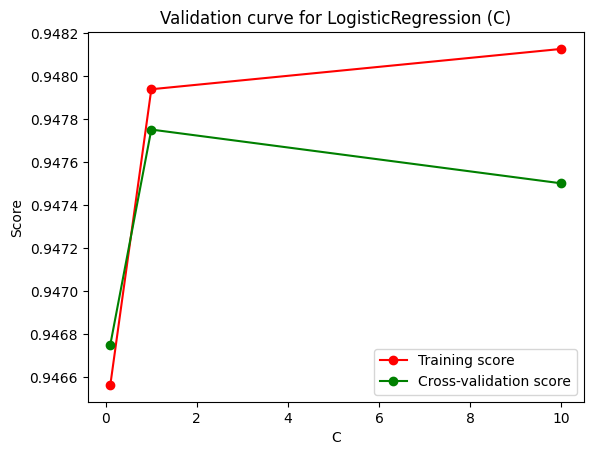

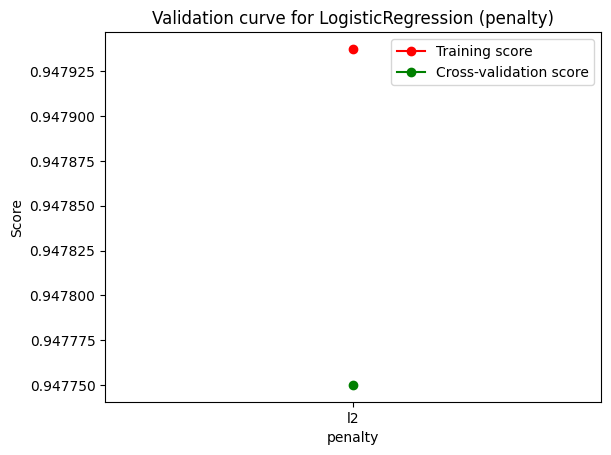

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split, learning_curve, validation_curve

for model in models:
    print(f"Grid search for {model['name']}")
    grid_search = GridSearchCV(model['model'], model['hyperparameters'], cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training accuracy: {grid_search.best_score_:.2f}")
    print(f"Test accuracy: {grid_search.score(X_test, y_test):.2f}")
    print('\n')
    
    # Plot learning curves for the best hyperparameters found during grid search
    train_sizes, train_scores, test_scores = learning_curve(
        grid_search.best_estimator_, X_train, y_train, cv=5)
    plt.figure()
    plt.title(f"Learning curve for {model['name']}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    # Plot validation curves for each hyperparameter
    for param_name, param_range in model['hyperparameters'].items():
        train_scores, test_scores = validation_curve(
            grid_search.best_estimator_, X_train, y_train, param_name=param_name, param_range=param_range, cv=5)
        plt.figure()
        plt.title(f"Validation curve for {model['name']} ({param_name})")
        plt.xlabel(f"{param_name}")
        plt.ylabel("Score")
        plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
        plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
        plt.legend(loc="best")